In [1]:
import os
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

In [2]:
f = scipy.io.loadmat('E:\Darren\SC_Exp\population_matdata_backup\zenodo\Discriminating\\v7_save\Exp3_EM15_M3_SC_context.mat')

In [3]:
# Extract data
Curvature=f['Bhvr']['Curvature'][0][0];
Angle=f['Bhvr']['Angle'][0][0];
Touch=f['Bhvr']['Touch'][0][0];
RunSpeed=f['Bhvr']['RunSpeed'][0][0];
Lick=f['Bhvr']['Lick'][0][0];

t=f['Spike']['t'][0][0][0];
TouchSig=f['Spike']['Sig'][0][0];
SpkCount=f['Spike']['SpkCount'][0][0]; #Trial x t x Neu

area=f['Stim']['area'][0][0][0];
context=f['Stim']['context'][0][0][0][0];
discriminating=f['Stim']['discriminating'][0][0][0][0];


In [4]:
print(Curvature.shape)
print(Angle.shape)
print(Touch.shape)
print(RunSpeed.shape)
print(Lick.shape)
print(t.shape)
print(TouchSig.shape)
print(SpkCount.shape)
print(area.shape)
print(context.shape)
print(discriminating.shape)


(167, 750)
(167, 750)
(167, 750)
(167, 750)
(167, 750)
(750,)
(110, 1)
(167, 750, 110)
()
()
()


In [12]:
Hit=f['Stim']['Type'][0][0][0][0]['Hit'];
CR=f['Stim']['Type'][0][0][0][0]['CR'];
GoAway=f['Stim']['Type'][0][0][0][0]['GoAway'];
NGAway=f['Stim']['Type'][0][0][0][0]['NGAway'];
Miss=f['Stim']['Type'][0][0][0][0]['Miss'];
FA=f['Stim']['Type'][0][0][0][0]['FA'];

Type = np.rec.fromarrays([Hit, CR, GoAway, NGAway, Miss, FA], names=['Hit', 'CR', 'GoAway', 'NGAway', 'Miss', 'FA']);
Type.shape

(167, 1)

In [47]:
#test block

range(NTimeBin)

NameError: name 'NTimeBin' is not defined

In [15]:
from sklearn import svm


In [49]:
NTimeBin=SpkCount.shape[1];
Ascore=np.empty(NTimeBin) 
for winepoch in range(NTimeBin):
    X=SpkCount[:,winepoch,:];
    y=[Type.Hit,Type.CR,Type.GoAway,Type.NGAway,Type.Miss,Type.FA];
    y=np.column_stack(y);
    y=np.where(y)[1];

    # Fit the SVM model
    model = svm.SVC(kernel='linear')
    model.fit(X, y)

    # Predict using the SVM model
    predictions = model.predict(X)

    # Evaluate the predictions
    accuracy = model.score(X, y)
    Ascore[winepoch] = accuracy
    print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 0.6047904191616766
Accuracy of SVM: 0.5149700598802395
Accuracy of SVM: 0.5149700598802395
Accuracy of SVM: 0.592814371257485
Accuracy of SVM: 0.6107784431137725
Accuracy of SVM: 0.5149700598802395
Accuracy of SVM: 0.5329341317365269
Accuracy of SVM: 0.562874251497006
Accuracy of SVM: 0.5389221556886228
Accuracy of SVM: 0.5508982035928144
Accuracy of SVM: 0.562874251497006
Accuracy of SVM: 0.5449101796407185
Accuracy of SVM: 0.5748502994011976
Accuracy of SVM: 0.6107784431137725
Accuracy of SVM: 0.5568862275449101
Accuracy of SVM: 0.5089820359281437
Accuracy of SVM: 0.5449101796407185
Accuracy of SVM: 0.5389221556886228
Accuracy of SVM: 0.5149700598802395
Accuracy of SVM: 0.592814371257485
Accuracy of SVM: 0.5449101796407185
Accuracy of SVM: 0.562874251497006
Accuracy of SVM: 0.5748502994011976
Accuracy of SVM: 0.5449101796407185
Accuracy of SVM: 0.5389221556886228
Accuracy of SVM: 0.5988023952095808
Accuracy of SVM: 0.48502994011976047
Accuracy of SVM: 0.5928143712574

Accuracy of SVM: 0.5808383233532934
Accuracy of SVM: 0.5568862275449101
Accuracy of SVM: 0.5568862275449101
Accuracy of SVM: 0.5988023952095808
Accuracy of SVM: 0.6287425149700598
Accuracy of SVM: 0.562874251497006
Accuracy of SVM: 0.5868263473053892
Accuracy of SVM: 0.6107784431137725
Accuracy of SVM: 0.5688622754491018
Accuracy of SVM: 0.5808383233532934
Accuracy of SVM: 0.6526946107784432
Accuracy of SVM: 0.5808383233532934
Accuracy of SVM: 0.5748502994011976
Accuracy of SVM: 0.5748502994011976
Accuracy of SVM: 0.6047904191616766
Accuracy of SVM: 0.6227544910179641
Accuracy of SVM: 0.5748502994011976
Accuracy of SVM: 0.5988023952095808
Accuracy of SVM: 0.5568862275449101
Accuracy of SVM: 0.592814371257485
Accuracy of SVM: 0.5988023952095808
Accuracy of SVM: 0.562874251497006
Accuracy of SVM: 0.6107784431137725
Accuracy of SVM: 0.5568862275449101
Accuracy of SVM: 0.562874251497006
Accuracy of SVM: 0.5568862275449101
Accuracy of SVM: 0.5508982035928144
Accuracy of SVM: 0.5568862275449

Accuracy of SVM: 0.562874251497006
Accuracy of SVM: 0.5089820359281437
Accuracy of SVM: 0.5089820359281437
Accuracy of SVM: 0.46706586826347307
Accuracy of SVM: 0.49700598802395207
Accuracy of SVM: 0.5089820359281437
Accuracy of SVM: 0.5209580838323353
Accuracy of SVM: 0.49101796407185627
Accuracy of SVM: 0.5269461077844312
Accuracy of SVM: 0.49700598802395207
Accuracy of SVM: 0.5209580838323353
Accuracy of SVM: 0.49700598802395207
Accuracy of SVM: 0.5029940119760479
Accuracy of SVM: 0.47904191616766467
Accuracy of SVM: 0.5149700598802395
Accuracy of SVM: 0.5269461077844312
Accuracy of SVM: 0.5029940119760479
Accuracy of SVM: 0.5209580838323353
Accuracy of SVM: 0.47904191616766467
Accuracy of SVM: 0.5209580838323353
Accuracy of SVM: 0.5389221556886228
Accuracy of SVM: 0.49700598802395207
Accuracy of SVM: 0.48502994011976047
Accuracy of SVM: 0.5209580838323353
Accuracy of SVM: 0.5029940119760479
Accuracy of SVM: 0.5209580838323353
Accuracy of SVM: 0.5568862275449101
Accuracy of SVM: 0.4

Accuracy of SVM: 0.47904191616766467
Accuracy of SVM: 0.49700598802395207
Accuracy of SVM: 0.5508982035928144
Accuracy of SVM: 0.5209580838323353
Accuracy of SVM: 0.5568862275449101
Accuracy of SVM: 0.5568862275449101
Accuracy of SVM: 0.5568862275449101
Accuracy of SVM: 0.49700598802395207
Accuracy of SVM: 0.5568862275449101
Accuracy of SVM: 0.5508982035928144
Accuracy of SVM: 0.562874251497006
Accuracy of SVM: 0.5029940119760479
Accuracy of SVM: 0.5808383233532934
Accuracy of SVM: 0.5329341317365269
Accuracy of SVM: 0.5568862275449101
Accuracy of SVM: 0.5329341317365269
Accuracy of SVM: 0.5449101796407185
Accuracy of SVM: 0.5808383233532934
Accuracy of SVM: 0.5389221556886228
Accuracy of SVM: 0.5269461077844312
Accuracy of SVM: 0.5389221556886228
Accuracy of SVM: 0.5089820359281437
Accuracy of SVM: 0.5508982035928144
Accuracy of SVM: 0.5508982035928144
Accuracy of SVM: 0.5089820359281437
Accuracy of SVM: 0.5209580838323353
Accuracy of SVM: 0.5029940119760479
Accuracy of SVM: 0.5209580

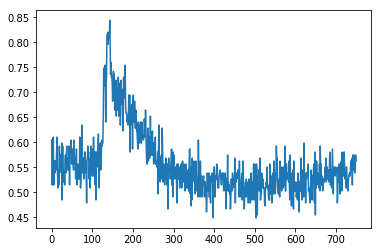

In [50]:
plt.plot(Ascore)

In [ ]:
tt=t.round(3)
tt=np.char.array(tt.astype(str))
print(tt)

In [173]:
df = pd.DataFrame(Bhvr, columns=tt)
df_transposed = df.T

In [174]:
print(df.info())
print(df.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 750 entries, -0.248 to 1.25
dtypes: float64(750)
memory usage: 978.6 KB
None
     -0.248    -0.246    -0.244    -0.242     -0.24    -0.238    -0.236  \
0  0.000050  0.000270  0.000368  0.000447  0.000518  0.000503  0.000448   
1  0.000514  0.000499  0.000454  0.000384  0.000250  0.000066 -0.000156   
2  0.000368  0.000282  0.000222  0.000190  0.000156  0.000125  0.000096   
3  0.000610  0.000713  0.000538  0.000349  0.000200  0.000182  0.000111   
4  0.000295  0.000296  0.000265  0.000222  0.000134  0.000032 -0.000102   
5  0.000251  0.000300  0.000308  0.000257  0.000190  0.000141  0.000117   

     -0.234    -0.232     -0.23  ...     1.232     1.234     1.236     1.238  \
0  0.000383  0.000380  0.000344  ...  0.000588  0.000532  0.000489  0.000478   
1 -0.000395 -0.000632 -0.000836  ...  0.000410  0.000440  0.000450  0.000372   
2  0.000064  0.000005 -0.000080  ...  0.000484  0.000487  0.000470  0.000456

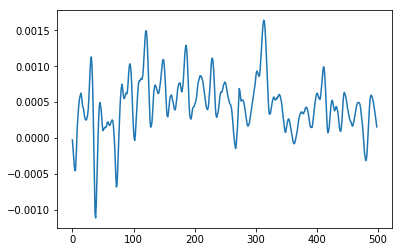

In [190]:
plt.plot(Bhvr[0,(t>0) & (t<1)].T)
plt.show()

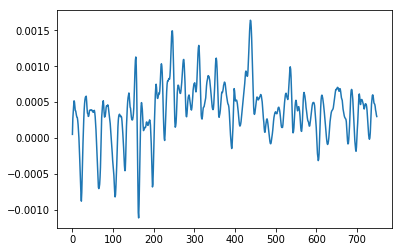

In [188]:
plt.plot(Bhvr[0,:].T)
plt.show()